In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import os, sys

In [2]:
sheet = pd.read_csv("100.csv")

In [3]:
print(sheet)

        'sample #'  'MLII'  'V5'
0                0     995  1011
1                1     995  1011
2                2     995  1011
3                3     995  1011
4                4     995  1011
...            ...     ...   ...
649995      649995    1009   928
649996      649996     935   942
649997      649997     889   951
649998      649998     871   957
649999      649999     768  1024

[650000 rows x 3 columns]


In [8]:
run 

OSError: data_ecg/210_MLII.csv not found.

OSError: data_ecg/210_MLII.csv not found.

In [5]:
tester=pd.read_csv("100.csv")[:2500]
#print(tester)
tester.iloc[:,1:2].apply(lambda srs: apply_convolution(srs, 10)).plot(figsize=(12, 8))
plt.axis('off'); pass

NameError: name 'apply_convolution' is not defined

In [ ]:
ilytristan=tester.iloc[:, 2]
goat=ilytristan.rolling(20).mean()
goat.plot(figsize=(12,8))
plt.axis('off');pass
print(goat)

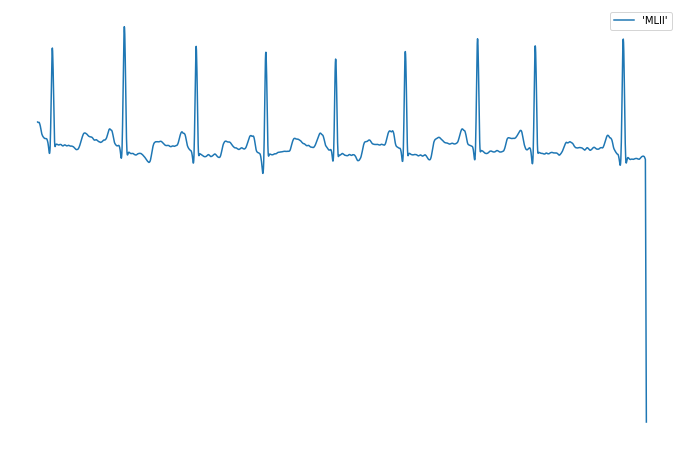

In [6]:
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(sig, conv, mode='same') / window
    return filtered
newshit=tester.rolling(5).mean()
newshit.iloc[:,1:2].apply(lambda srs: apply_convolution(srs, 10)).plot(figsize=(12, 8))
plt.axis('off'); pass

[[       nan+nanj        nan+nanj        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]
 [       nan+nanj        nan+nanj        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]
 [       nan+nanj        nan+nanj        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]
 ...
 [348.1956   +0.j 348.1956   +0.j 348.1956   +0.j ... 348.1956   +0.j
  348.1956   +0.j 348.1956   +0.j]
 [347.747904 +0.j 347.747904 +0.j 347.747904 +0.j ... 347.747904 +0.j
  347.747904 +0.j 347.747904 +0.j]
 [347.747904 +0.j 347.747904 +0.j 347.747904 +0.j ... 347.747904 +0.j
  347.747904 +0.j 347.747904 +0.j]]


<ipython-input-7-ba0dcad3cc3d>:16: RuntimeWarning: invalid value encountered in greater
  psd_idxs = (psd > threshold)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

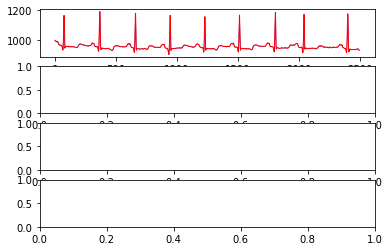

In [7]:
n=len(newshit)
dt=0.001 
t=newshit.iloc[:,:1]
signal=newshit.iloc[:,1:2]
signal_clean=signal
minsignal, maxsignal = signal.min(), signal.max()

fhat=np.fft.fft(signal,n)
psd=fhat*np.conj(fhat)/n
freq=(1/(dt*n))*np.arange(n)
idxs_half=np.arange(1,np.floor(n/2),dtype=np.int32)

print(psd)

threshold=0
psd_idxs = (psd > threshold)
psd_clean=psd*psd_idxs
fhat_clean=psd_idxs*fhat
signal_filtered=np.fft.ifft(fhat_clean)


fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD noisy')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal Retrieved')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

In [ ]:
ilytristan=newshit.
ilytristan.iloc[:,1:2].apply(lambda srs: apply_convolution(srs, 10)).plot(figsize=(12, 8))
plt.axis('off'); pass